# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
import re

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt

# Testing

In [12]:
df = pd.read_csv("../Dataset/2_Korea_Bakery_Price.csv")

In [13]:
df

,Name,price
0,angbutter,4800
1,plain bread,3500
2,jam,1500
3,ice coffe,4000
4,croissant,3500
5,ice coffe latter,4500
6,tiramisu croissant,4800
7,cacao deep,4000
8,pain au chocolat,3500
9,almond croissant,4000


# Load Data

In [6]:
listDataPretrainedModel = []

In [7]:
def addDataPretrainedModel(path):
    try:
        df = pd.read_excel(path)
    except Exception:
        df = pd.read_csv(path)
    listDataPretrainedModel.append(df)

In [8]:
onlyfiles = [f for f in listdir("../Dataset") if isfile(join("../Dataset", f))]

In [9]:
onlyfiles

['1 Coffe_Sales.csv',
 '10 Europe_Bike_Store_Sales.csv',
 '11 E-commerce_Business_Transaction.csv',
 '12 Liquor_Sales.csv',
 '2 Coffee_Bean_Sales.csv',
 '3 Balaji_Fast_Food_Sales.csv',
 '4 Pizza_Sales.csv',
 '5 Coffee_Shop_Sales.xlsx',
 '6 French_Bakery_Daily_Sales.csv',
 '7 Mexico_Toy_Sales.csv',
 '8 Online_Retail_Sales.csv',
 '9 Electronic_Sales.csv']

In [10]:
for file in onlyfiles:
    pathFile = join('../Dataset/', file)
    addDataPretrainedModel(path=pathFile)

In [11]:
listDataPretrainedModel[1]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


# Preprocessing

## Based

In [12]:
import copy

listTest = copy.deepcopy(listDataPretrainedModel)

In [13]:
def clean_column_names(df):
    def clean_name(name):
        name = name.lower()
        name = re.sub(r'[^\w]', '', name)
        name = name.replace(' ', '')
        name = name.replace('_', '')
        return name
    
    df.columns = [clean_name(col) for col in df.columns]
    df = df.loc[:, ~df.columns.str.contains('cust')]

    return df

In [14]:
listTest = [clean_column_names(df) for df in listTest]

## Date

In [15]:
def standardize_date_columns(df):    
    date_columns = [col for col in df.columns if 'date' in col]
    
    if not date_columns:
        raise ValueError("Dataset tidak memiliki kolom yang mengandung kata 'date'.")

    standardized_dates = []

    for col in date_columns:
        df[col] = df[col].astype(str) 
        if (df[col].str.contains('/').any() and df[col].str.contains('-').any()):
            df[col] = df[col].str.replace('-', '/')
        try:
            df[col] = pd.to_datetime(df[col]) 
        except Exception:
            try:
                df[col] = pd.to_datetime(df[col], format="%d/%m/%Y")
            except Exception:
                try:
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                except Exception:
                    continue
        
        standardized_dates.append(df[col])
        
        # endfor

    df.drop(columns=date_columns, inplace=True)
    
    df['TEMP DATE'] = pd.concat(standardized_dates, axis=1).bfill(axis=1).iloc[:, 0]
    
    df = df.sort_values('TEMP DATE')
    return df



## Product

In [17]:
def standardize_product_columns(df):
    prioritize_name = ['sku', 'description', 'name', 'detail', 'product', 'article']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    delete_col = []
    
    if len(found_columns) > 1:
        for i in range(len(found_columns)):
            if 'category' in found_columns[i]:
                delete_col.append(i)
                
    for i in range(len(delete_col)):
        found_columns.pop(delete_col[i])
    
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP PRODUCT'})
    
    found_columns = []
    return df

## Quantity

In [19]:
def standardize_quantity_columns(df):
    prioritize_name = ['quantity', 'qty', 'units']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    if len(found_columns) == 0:
        df['TEMP QUANTITY'] = 1
        df['TEMP QUANTITY'] = df['TEMP QUANTITY'].astype(float)

        return df
    
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP QUANTITY'})
    df['TEMP QUANTITY'] = df['TEMP QUANTITY'].astype(float)
    
    df = df[df['TEMP QUANTITY'] > 0]

    
    found_columns = []
    return df

## Price

In [21]:
def standardize_price_columns(df):
    prioritize_name = ['money', 'price']
    found_columns = []
    
    for name in prioritize_name:
        for col in df.columns:
            if name in col:
                found_columns.append(col)
        
        if len(found_columns) != 0:
            break
    
    delete_col = []
    
    if len(found_columns) > 1:
        for i in range(len(found_columns)):
            if 'total' in found_columns[i]:
                delete_col.append(i)
    
                    
    for i in range(len(delete_col)):
            found_columns.pop(delete_col[i])
                
    df = df.rename(columns={f'{found_columns[0]}': 'TEMP PRICE'})
    
    df['TEMP PRICE'] = df['TEMP PRICE'].astype(str)

    
    df['TEMP PRICE'] = df['TEMP PRICE'].str.replace(',', '.', regex=False)
    
    df['TEMP PRICE'] = df['TEMP PRICE'].str.replace(r'[^0-9.]', '', regex=True)
    
    df['TEMP PRICE'] = df['TEMP PRICE'].astype(float)
    
    df = df[df['TEMP PRICE'] > 0]
    
    found_columns = []
    return df

## Filtering Column

In [23]:
def remove_non_temp_columns(df):
    temp_columns = [col for col in df.columns if 'TEMP' in col]
    
    df = df[temp_columns]
    
    return df

In [ ]:
def clean_and_standardize_data(df):
    df = clean_column_names(df)
    df = standardize_date_columns(df)
    df = standardize_product_columns(df)    
    df = standardize_quantity_columns(df)
    df = standardize_price_columns(df)
    df = remove_non_temp_columns(df)
    return df

In [ ]:
listTest = [clean_and_standardize_data(df) for df in listTest]

# Extract Data

In [28]:
listTestExtract = copy.deepcopy(listTest)

In [29]:
def process_aggregated_data(df):
    required_columns = ['TEMP DATE', 'TEMP PRODUCT', 'TEMP PRICE', 'TEMP QUANTITY']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Input DataFrame harus memiliki kolom {required_columns}")
    
    
    df['Year'] = pd.to_datetime(df['TEMP DATE']).dt.year
    df['Month'] = pd.to_datetime(df['TEMP DATE']).dt.month
    df['Day'] = pd.to_datetime(df['TEMP DATE']).dt.day
    df['Is_Weekend'] = pd.to_datetime(df['TEMP DATE']).dt.weekday >= 5  

    grouped = df.groupby('TEMP DATE')

    # Hitung kolom tambahan
    aggregated_data = grouped.agg(
        Total_Products=('TEMP PRODUCT', 'nunique'),
        # Mean_Price_Per_Product=('TEMP PRICE', 'mean'),
        Highest_Price=('TEMP PRICE', 'max'),
        Lowest_Price=('TEMP PRICE', 'min'),
        Total_Quantity=('TEMP QUANTITY', 'sum'),
        Mean_Quantity_Per_Transaction=('TEMP QUANTITY', 'mean'),
        Highest_Quantity_Product=('TEMP QUANTITY', 'max'),
        Lowest_Quantity_Product=('TEMP QUANTITY', 'min'),
        Profit_Per_Day=('TEMP PRICE', lambda x: (x * df.loc[x.index, 'TEMP QUANTITY']).sum())
    ).reset_index()
    
    product_avg_price = df.groupby(['TEMP DATE', 'TEMP PRODUCT'])['TEMP PRICE'].mean().reset_index()
    mean_price_per_product = product_avg_price.groupby('TEMP DATE')['TEMP PRICE'].mean().reset_index()
    mean_price_per_product.rename(columns={'TEMP PRICE': 'Mean_Price_Per_Product'}, inplace=True)


    # Tambahkan informasi tanggal ke hasil agregasi
    aggregated_data['Year'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.year
    aggregated_data['Month'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.month
    aggregated_data['Day'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.day
    aggregated_data['Is_Weekend'] = pd.to_datetime(aggregated_data['TEMP DATE']).dt.weekday >= 5
    
    
    aggregated_data = pd.merge(aggregated_data, mean_price_per_product, on='TEMP DATE', how='left')
    
    desired_column_order = [
        'TEMP DATE', 'Year', 'Month', 'Day', 'Is_Weekend',
        'Total_Products', 'Highest_Price', 'Lowest_Price', 
        'Mean_Price_Per_Product', 'Total_Quantity', 
        'Mean_Quantity_Per_Transaction', 'Highest_Quantity_Product', 
        'Lowest_Quantity_Product', 'Profit_Per_Day'
    ]
    aggregated_data = aggregated_data[desired_column_order]
    
    aggregated_data = aggregated_data.rename(columns={'TEMP DATE': 'Date'})



    return aggregated_data


In [30]:
listTestExtract = [process_aggregated_data(df) for df in listTestExtract]

# Data Splitting

In [97]:
listTestSplitting = copy.deepcopy(listTestExtract)

In [98]:
train_data = []
test_data = []

for i, df in enumerate(listTestSplitting):  # Tambahkan indeks sebagai Dataset_ID
    split_index = int(0.8 * len(df))

    train, test = df.iloc[:split_index], df.iloc[split_index:]

    # Tambahkan kolom Dataset_ID
    train['Dataset_ID'] = i
    test['Dataset_ID'] = i

    # Pisahkan fitur dan target
    X_train = train.drop(columns=['Profit_Per_Day'])
    y_train = train['Profit_Per_Day']
    X_test = test.drop(columns=['Profit_Per_Day'])
    y_test = test['Profit_Per_Day']

    # Simpan hasil split ke dalam list
    train_data.append((X_train, y_train))
    test_data.append((X_test, y_test))

C:\Users\ipung\AppData\Local\Temp\ipykernel_21864\1955794030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Dataset_ID'] = i
C:\Users\ipung\AppData\Local\Temp\ipykernel_21864\1955794030.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Dataset_ID'] = i
C:\Users\ipung\AppData\Local\Temp\ipykernel_21864\1955794030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [99]:
X_train_full = pd.concat([data[0] for data in train_data], axis=0).reset_index(drop=True)
y_train_full = pd.concat([data[1] for data in train_data], axis=0).reset_index(drop=True)
X_test_full = pd.concat([data[0] for data in test_data], axis=0).reset_index(drop=True)
y_test_full = pd.concat([data[1] for data in test_data], axis=0).reset_index(drop=True)

In [100]:
X_train_full.columns

Index(['Date', 'Year', 'Month', 'Day', 'Is_Weekend', 'Total_Products',
       'Highest_Price', 'Lowest_Price', 'Mean_Price_Per_Product',
       'Total_Quantity', 'Mean_Quantity_Per_Transaction',
       'Highest_Quantity_Product', 'Lowest_Quantity_Product', 'Dataset_ID'],
      dtype='object')

# Model

## Catboost

In [34]:
from catboost import CatBoostRegressor, Pool

In [35]:
cat_features = ['Year', 'Month', 'Day', 'Is_Weekend', 'Dataset_ID']

In [73]:
eval_set = Pool(data=X_test_full, label=y_test_full, cat_features=cat_features)

model = CatBoostRegressor(
    iterations=10000,
    depth=16,
    learning_rate=0.03,   
    l2_leaf_reg=2,
    random_strength=0.5,
    # bagging_temperature=1.5,
    subsample=0.8,
    max_bin=300,
    cat_features=cat_features,
    loss_function='RMSE',
    eval_metric='RMSE',
    bootstrap_type='Bernoulli',  
    # random_seed=42
)

In [74]:
model.fit(X_train_full, y_train_full, eval_set=eval_set, verbose=10)

0:	learn: 32886.8157723	test: 51057.0966440	best: 51057.0966440 (0)	total: 1.16s	remaining: 3h 14m 5s
10:	learn: 25175.9452639	test: 41530.1605303	best: 41530.1605303 (10)	total: 20.3s	remaining: 5h 7m 44s
20:	learn: 19521.3920882	test: 35107.7198306	best: 35107.7198306 (20)	total: 39.4s	remaining: 5h 11m 52s
30:	learn: 15283.3723785	test: 30229.4320067	best: 30229.4320067 (30)	total: 59.6s	remaining: 5h 19m 31s
40:	learn: 12142.7990477	test: 26849.6850932	best: 26849.6850932 (40)	total: 1m 21s	remaining: 5h 31m 46s
50:	learn: 9840.4895997	test: 24253.4581090	best: 24253.4581090 (50)	total: 1m 43s	remaining: 5h 35m 21s
60:	learn: 8194.2362068	test: 22765.3151104	best: 22765.3151104 (60)	total: 2m 3s	remaining: 5h 36m 2s
70:	learn: 7007.1492593	test: 21777.1324162	best: 21777.1324162 (70)	total: 2m 24s	remaining: 5h 37m 46s


KeyboardInterrupt: 

In [67]:
y_pred = model.predict(X_test_full)
mae = abs(y_test_full - y_pred).mean()
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2397.21


In [41]:
figsize=(16, 6)

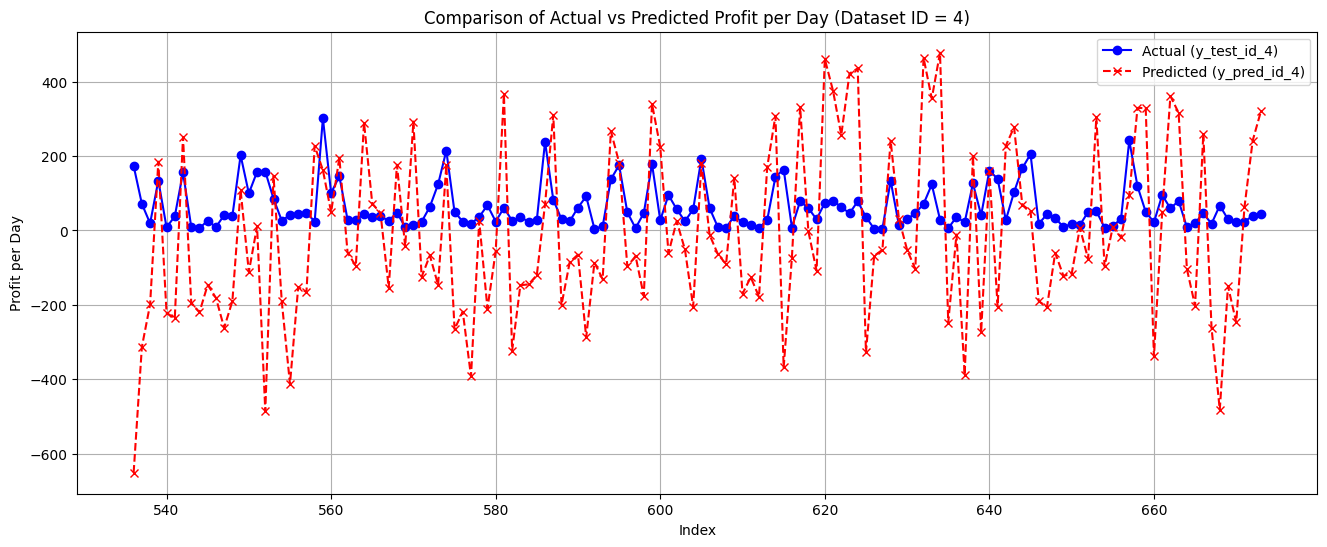

In [68]:
X_test_id_4 = X_test_full[X_test_full['Dataset_ID'] == 4]
y_test_id_4 = y_test_full[X_test_full['Dataset_ID'] == 4]

y_pred_id_4 = model.predict(X_test_id_4)

plt.figure(figsize=figsize)
plt.plot(y_test_id_4.index, y_test_id_4, label='Actual (y_test_id_4)', color='blue', linestyle='-', marker='o')
plt.plot(y_test_id_4.index, y_pred_id_4, label='Predicted (y_pred_id_4)', color='red', linestyle='--', marker='x')

plt.title('Comparison of Actual vs Predicted Profit per Day (Dataset ID = 4)')
plt.xlabel('Index')
plt.ylabel('Profit per Day')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

In [101]:
import xgboost as XGBRegressor
from sklearn.metrics import mean_absolute_error

In [102]:
for df in [X_train_full, X_test_full]:
    df['Date'] = df['Date'].astype('int64') // 10**9

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.005,
    max_depth=12,    
    subsample=0.3,
    colsample_bytree=0.9,
)

eval_set = [(X_train_full, y_train_full), (X_test_full, y_test_full)]
model.fit(
    X_train_full,
    y_train_full,
    eval_set=eval_set,
    # eval_metric="mae",
    # early_stopping_rounds=10,
    verbose=100
)


[0]	validation_0-rmse:33635.50549	validation_1-rmse:51885.08167
[100]	validation_0-rmse:21417.08131	validation_1-rmse:35621.84193
[200]	validation_0-rmse:14030.19427	validation_1-rmse:26053.77542
[300]	validation_0-rmse:9590.77136	validation_1-rmse:20460.08438
[400]	validation_0-rmse:6965.77617	validation_1-rmse:17333.99426
[500]	validation_0-rmse:5441.39795	validation_1-rmse:15568.84728
[600]	validation_0-rmse:4520.67399	validation_1-rmse:14457.41045
[700]	validation_0-rmse:3913.19595	validation_1-rmse:13651.25372
[800]	validation_0-rmse:3489.42930	validation_1-rmse:13068.60590
[900]	validation_0-rmse:3154.31085	validation_1-rmse:12646.71314
[1000]	validation_0-rmse:2931.75089	validation_1-rmse:12326.29235
[1100]	validation_0-rmse:2736.33942	validation_1-rmse:12120.76082
[1200]	validation_0-rmse:2548.88374	validation_1-rmse:11919.10784
[1300]	validation_0-rmse:2395.40816	validation_1-rmse:11790.53977
[1400]	validation_0-rmse:2226.63514	validation_1-rmse:11645.02101
[1500]	validation_0

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=2048,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
figsize=(16, 6)

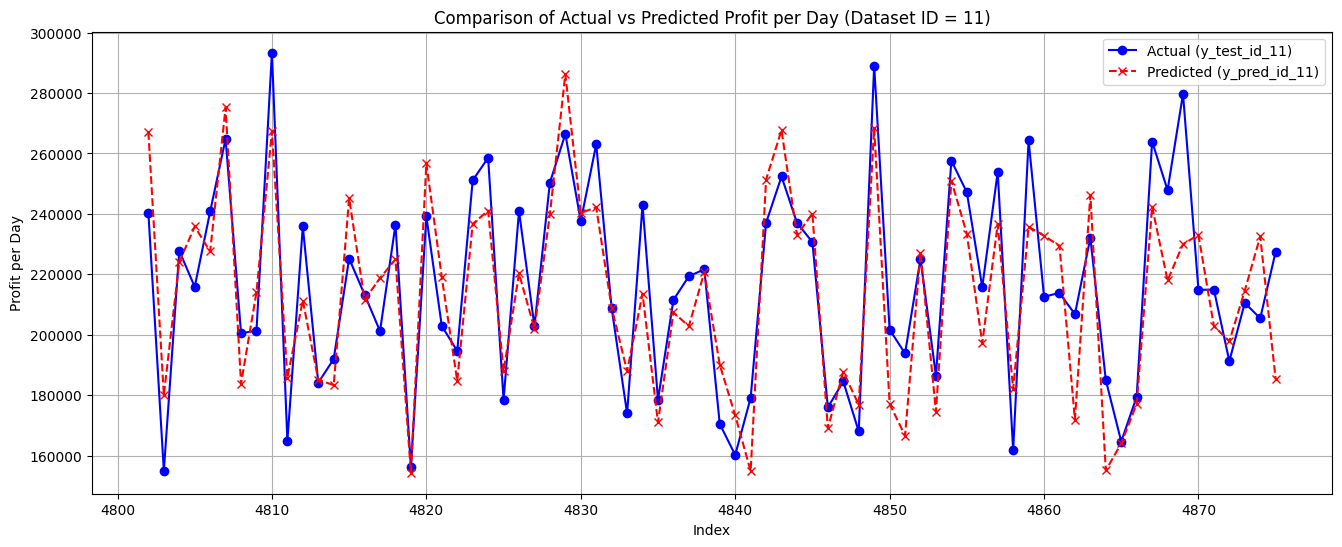

In [274]:
import matplotlib.pyplot as plt

X_test_id_11 = X_test_full[X_test_full['Dataset_ID'] == 11]
y_test_id_11 = y_test_full[X_test_full['Dataset_ID'] == 11]
y_pred_id_11 = model.predict(X_test_id_11)
plt.figure(figsize=figsize)
plt.plot(y_test_id_11.index, y_test_id_11, label='Actual (y_test_id_11)', color='blue', linestyle='-', marker='o')
plt.plot(y_test_id_11.index, y_pred_id_11, label='Predicted (y_pred_id_11)', color='red', linestyle='--', marker='x')
plt.title('Comparison of Actual vs Predicted Profit per Day (Dataset ID = 11)')
plt.xlabel('Index')
plt.ylabel('Profit per Day')
plt.legend()
plt.grid(True)
plt.show()


# Test for Another Dataset
